In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("all_caqtls.scores.tsv", sep="\t")

In [3]:
data.columns

Index(['chr', 'pos', 'allele1', 'allele2', 'rsid', 'Esan.mean.logfc',
       'Esan.mean.abs_logfc', 'Esan.mean.jsd', 'Esan.mean.abs_logfc_x_jsd',
       'Esan.mean.abs_logfc_x_jsd_x_max_percentile',
       'Esan.mean.max_percentile', 'Esan.mean.abs_logfc.pval',
       'Esan.mean.jsd.pval', 'Esan.mean.abs_logfc_x_jsd.pval',
       'Esan.mean.abs_logfc_x_jsd_x_max_percentile.pval', 'Mende.mean.logfc',
       'Mende.mean.abs_logfc', 'Mende.mean.jsd', 'Mende.mean.abs_logfc.pval',
       'Mende.mean.jsd.pval', 'Yoruba.mean.logfc', 'Yoruba.mean.abs_logfc',
       'Yoruba.mean.jsd', 'Yoruba.mean.abs_logfc.pval', 'Yoruba.mean.jsd.pval',
       'GM12878.ENCSR095QNB.mean.logfc', 'GM12878.ENCSR095QNB.mean.abs_logfc',
       'GM12878.ENCSR095QNB.mean.jsd',
       'GM12878.ENCSR095QNB.mean.abs_logfc_x_jsd',
       'GM12878.ENCSR095QNB.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR095QNB.mean.max_percentile',
       'GM12878.ENCSR095QNB.mean.abs_logfc.pval',
       'GM12878.ENCSR095QN

In [4]:
import numpy as np
data_dnase = pd.read_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/chrombpnet_preds/dnase_preds/DNASE_NEW/summary.mean.variant_scores_new_3.tsv", sep="\t", header=0)
data_atac = pd.read_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/chrombpnet_preds/atac/ATAC/summary.mean.variant_scores_new_2.tsv", sep="\t", header=0)
data_atac_50m = pd.read_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/chrombpnet_preds/atac_50M/ATAC_50M/summary.mean.variant_scores_new_2.tsv", sep="\t", header=0)

In [5]:
vals = ['GM12878.ENCSR637XSC.mean.logfc', 'GM12878.ENCSR637XSC.mean.abs_logfc', 'GM12878.ENCSR637XSC.mean.jsd',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR637XSC.mean.max_percentile',
       'GM12878.ENCSR637XSC.mean.abs_logfc.pval',
       'GM12878.ENCSR637XSC.mean.jsd.pval',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd.pval',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile.pval']

In [6]:
for val in vals:
    #print(val)
    if "pval" not in val:
        data[val] = data_atac[val.replace("GM12878.ENCSR637XSC.mean.", "")+".mean"]
    else:
        data[val] = data_atac[val.replace("GM12878.ENCSR637XSC.mean.", "").replace(".pval",".mean.pval")]

In [7]:
for val in vals:
    #print(val)
    if "pval" not in val:
        data[val.replace("ENCSR637XSC", "ENCSR637XSC.sub.50M")] = data_atac_50m[val.replace("GM12878.ENCSR637XSC.mean.", "")+".mean"]
    else:
        data[val.replace("ENCSR637XSC", "ENCSR637XSC.sub.50M")] = data_atac_50m[val.replace("GM12878.ENCSR637XSC.mean.", "").replace(".pval",".mean.pval")]

In [8]:
for val in vals:
    #print(val)
    if "pval" not in val:
        data[val.replace("ENCSR637XSC", "ENCSR000EMT")] = data_dnase[val.replace("GM12878.ENCSR637XSC.mean.", "")+".mean"]
    else:
        data[val.replace("ENCSR637XSC", "ENCSR000EMT")] = data_dnase[val.replace("GM12878.ENCSR637XSC.mean.", "").replace(".pval",".mean.pval")]

In [9]:
data[data.columns[0:70].tolist()+data.columns[77:].tolist()+data.columns[70:77].tolist()].shape

(219382, 97)

In [10]:
data[data.columns[0:5].tolist()+data.columns[70:77].tolist()]

,chr,pos,allele1,allele2,rsid,region,snp,distance,pval,beta,se,abs_beta
0,chr1,866281,C,T,1_866281_C_T,1:866099:866351,1_866281_C_T,181,0.974280,0.006546,0.202449,0.006546
1,chr1,866300,A,C,1_866300_A_C,1:866099:866351,1_866300_A_C,200,0.974280,0.006546,0.202449,0.006546
2,chr1,870176,T,A,1_870176_T_A,1:869800:870282,1_870176_T_A,375,0.071532,-0.250142,0.137133,0.250142
3,chr1,904947,G,A,1_904947_G_A,1:904938:905544,1_904947_G_A,8,0.290840,0.174397,0.164112,0.174397
4,chr1,905373,C,T,1_905373_T_C,1:904938:905544,1_905373_T_C,434,0.188152,-0.130176,0.098145,0.130176
...,...,...,...,...,...,...,...,...,...,...,...,...
219377,chr22,50627388,G,A,22_50627388_G_A,22:50627308:50627508,22_50627388_G_A,79,0.405697,-0.136940,0.163901,0.136940
219378,chr22,50628124,C,G,22_50628124_C_G,22:50627514:50628822,22_50628124_C_G,609,0.742636,0.021773,0.066098,0.021773
219379,chr22,50628493,G,A,22_50628493_G_A,22:50627514:50628822,22_50628493_G_A,978,0.729436,0.028973,0.083502,0.028973
219380,chr22,50628562,C,T,22_50628562_C_T,22:50627514:50628822,22_50628562_C_T,1047,0.191678,-0.076209,0.057921,0.076209


In [11]:
anscs = data.columns[5:70].tolist()+data.columns[77:].tolist()
anscs = [ans.split(".")[0] for ans in anscs]
anscs = set(anscs)
print(anscs)

sub_list = []
for ans in anscs:
    if ans == "GM12878":
        for title in [".ENCSR637XSC", ".ENCSR000EMT", ".ENCSR637XSC.sub.50M", ".ENCSR095QNB"]:
            sub_list.append(ans+title+".mean.logfc")
            data[ans+title+".mean.sign.jsd"] = np.sign(data[ans+title+".mean.logfc"]) * data[ans+title+".mean.jsd"]
            sub_list.append(ans+title+".mean.sign.jsd")
            sub_list.append(ans+title+".mean.abs_logfc_x_jsd_x_max_percentile")
            sub_list.append(ans+title+".mean.abs_logfc_x_jsd_x_max_percentile.pval")
    else:
        sub_list.append(ans+".mean.logfc")
        data[ans+".mean.sign.jsd"] = np.sign(data[ans+".mean.logfc"]) * data[ans+".mean.jsd"]
        sub_list.append(ans+".mean.sign.jsd")        

    

{'afr', 'Yoruba', 'Maasai', 'Luhya', 'Mende', 'Esan', 'GM12878', 'eur', 'Gambian'}


In [12]:
data = data[data.columns[0:5].tolist()+data.columns[70:77].tolist()+sub_list]
data.columns

Index(['chr', 'pos', 'allele1', 'allele2', 'rsid', 'region', 'snp', 'distance',
       'pval', 'beta', 'se', 'abs_beta', 'afr.mean.logfc', 'afr.mean.sign.jsd',
       'Yoruba.mean.logfc', 'Yoruba.mean.sign.jsd', 'Maasai.mean.logfc',
       'Maasai.mean.sign.jsd', 'Luhya.mean.logfc', 'Luhya.mean.sign.jsd',
       'Mende.mean.logfc', 'Mende.mean.sign.jsd', 'Esan.mean.logfc',
       'Esan.mean.sign.jsd', 'GM12878.ENCSR637XSC.mean.logfc',
       'GM12878.ENCSR637XSC.mean.sign.jsd',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile.pval',
       'GM12878.ENCSR000EMT.mean.logfc', 'GM12878.ENCSR000EMT.mean.sign.jsd',
       'GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd_x_max_percentile.pval',
       'GM12878.ENCSR637XSC.sub.50M.mean.logfc',
       'GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd',
       'GM12878.ENCSR637XSC.sub.50M.mean.abs_logfc_x_jsd

In [13]:
sig_data = pd.read_csv("af_caqtls/significant.caqtls.list.tsv", sep="\t")

In [14]:
print(min(sig_data["pval"]))
print(max(sig_data["pval"]))

2.92178e-41
9.99633e-06


In [15]:
sig_data.head()


,chr,pos,allele1,allele2,rsid,region,snp,distance,pval,beta,se,abs_beta
0,chr1,906982,C,T,1_906982_C_T,1:906596:907043,1_906982_C_T,385,4.802840e-06,-0.520262,0.106740,0.520262
1,chr1,921203,G,A,1_921203_G_A,1:921132:921332,1_921203_G_A,70,6.892040e-06,0.905971,0.189412,0.905971
2,chr1,976215,A,G,1_976215_A_G,1:975872:976361,1_976215_A_G,342,2.622420e-11,-0.615266,0.080637,0.615266
3,chr1,1038800,T,G,1_1038800_G_T,1:1038791:1039035,1_1038800_G_T,8,1.169820e-11,0.700579,0.089787,0.700579
4,chr1,1038819,T,C,1_1038819_C_T,1:1038791:1039035,1_1038819_C_T,27,1.169820e-11,0.700579,0.089787,0.700579


In [16]:
data["label"] = data["rsid"].isin(sig_data["rsid"])

In [17]:
data.shape

(219382, 45)

9.99633e-06
2.92178e-41


<AxesSubplot:>

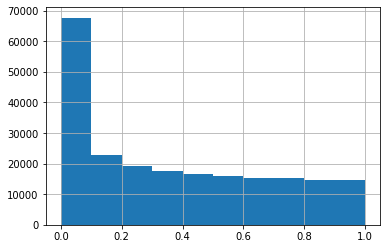

In [18]:
print(max(data[data["label"]]["pval"]))
print(min(data[data["label"]]["pval"]))
data["pval"].hist()

In [19]:
data["pos0"] = data["pos"] - 1
selected_beds = data[["chr", "pos0", "pos"]+data.columns[2:-1].tolist()]
selected_beds.head()


,chr,pos0,pos,allele1,allele2,rsid,region,snp,distance,pval,...,GM12878.ENCSR637XSC.sub.50M.mean.abs_logfc_x_jsd_x_max_percentile.pval,GM12878.ENCSR095QNB.mean.logfc,GM12878.ENCSR095QNB.mean.sign.jsd,GM12878.ENCSR095QNB.mean.abs_logfc_x_jsd_x_max_percentile,GM12878.ENCSR095QNB.mean.abs_logfc_x_jsd_x_max_percentile.pval,eur.mean.logfc,eur.mean.sign.jsd,Gambian.mean.logfc,Gambian.mean.sign.jsd,label
0,chr1,866280,866281,C,T,1_866281_C_T,1:866099:866351,1_866281_C_T,181,0.974280,...,0.406902,-0.031931,-0.009045,0.000162,0.192846,-0.037148,-0.009848,-0.010779,-0.011243,False
1,chr1,866299,866300,A,C,1_866300_A_C,1:866099:866351,1_866300_A_C,200,0.974280,...,0.686779,-0.001747,-0.008332,0.000052,0.328184,0.009631,0.010377,0.007855,0.009833,False
2,chr1,870175,870176,T,A,1_870176_T_A,1:869800:870282,1_870176_T_A,375,0.071532,...,0.273741,0.036457,0.019025,0.001262,0.048612,0.066168,0.015354,0.023853,0.011588,False
3,chr1,904946,904947,G,A,1_904947_G_A,1:904938:905544,1_904947_G_A,8,0.290840,...,0.355028,-0.025704,-0.011829,0.000317,0.131444,-0.018358,-0.011800,-0.024516,-0.008703,False
4,chr1,905372,905373,C,T,1_905373_T_C,1:904938:905544,1_905373_T_C,434,0.188152,...,0.058782,-0.127411,-0.025277,0.003640,0.018781,0.121536,0.024607,-0.057097,-0.012910,False


In [20]:
import pybedtools
beds_var = pybedtools.BedTool.from_dataframe(selected_beds)
peak_bed = pybedtools.BedTool('/mnt/lab_data2/anusri/chromatin-atlas-anvil/data/afgr_data/peak_files/merged.peaks.af.top.50k.bed')
sig_vars_in_bed = beds_var.intersect(peak_bed, c=True)

In [21]:
#sig_vars_in_bed.to_dataframe()

In [22]:
sig_vars_in_bed = sig_vars_in_bed.to_dataframe(names=selected_beds.columns.tolist() + ["count"])


In [23]:
sig_vars_in_bed["in_peaks"] = sig_vars_in_bed["count"]>0

In [24]:
sig_vars_in_bed.head(1)

,chr,pos0,pos,allele1,allele2,rsid,region,snp,distance,pval,...,GM12878.ENCSR095QNB.mean.sign.jsd,GM12878.ENCSR095QNB.mean.abs_logfc_x_jsd_x_max_percentile,GM12878.ENCSR095QNB.mean.abs_logfc_x_jsd_x_max_percentile.pval,eur.mean.logfc,eur.mean.sign.jsd,Gambian.mean.logfc,Gambian.mean.sign.jsd,label,count,in_peaks
0,chr1,866280,866281,C,T,1_866281_C_T,1:866099:866351,1_866281_C_T,181,0.97428,...,-0.009045,0.000162,0.192846,-0.037148,-0.009848,-0.010779,-0.011243,False,0,False


In [25]:
sum(sig_vars_in_bed["in_peaks"])

90158

In [26]:
sum(sig_vars_in_bed[sig_vars_in_bed["in_peaks"]]["label"])

6827

In [27]:
sig_vars_in_bed[sig_vars_in_bed["in_peaks"]]["label"].shape

(90158,)

In [28]:
sig_vars_in_bed.shape

(219382, 48)

In [29]:
#sig_vars_in_bed[['chr', 'pos', 'allele1', 'allele2', "label"]].to_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/source2_new_filter.tsv", sep="\t", header=True, index=False)



In [30]:
# import pybedtools
# beds_var = pybedtools.BedTool.from_dataframe(selected_beds)
# peak_bed = pybedtools.BedTool('af_caqtls/merged.peaks.af.bed')
# sig_vars_in_bed = beds_var.intersect(peak_bed, wa=True)

In [31]:
# sig_vars_in_bed = sig_vars_in_bed.to_dataframe(names=["chr", "pos0", "pos"]+data.columns[2:-1].tolist()).drop_duplicates()


In [32]:
# sig_vars_in_bed.shape

In [33]:
# data.shape

In [34]:
# sum(sig_vars_in_bed["label"]==1)

In [35]:
#sig_vars_in_bed[['chr', 'pos', 'allele1', 'allele2', "label"]].to_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/source2.tsv", sep="\t", header=True, index=False)

In [36]:
#enforer_recomputed_preds
import pickle as pkl
import os

mean_change=[]
rsids=[]

enf_dir="/mnt/lab_data2/anusri/variant-scorer/src/output/afr_caqtls_window/"
for diri in ["splitaa", "splitab", "splitac"]:
    enformer_recompute = pkl.load(open(enf_dir+diri+"/predictions_at_snp.pkl",'rb'))
    for i in range(enformer_recompute["ref_logcount_preds"].shape[0]):
        mean_change.append(np.log2( (enformer_recompute["ref_logcount_preds"][i,440:456].sum()+1) / (enformer_recompute["alt_logcount_preds"][i,440:456].sum()+1)))
        rsids.append(enformer_recompute["rsids"][i])
mean_change = np.array(mean_change)


In [37]:
mean_change.shape

(116499,)

In [38]:
rsids[0]

'chr1_870175_T_A_False'

In [39]:
sig_vars_in_bed.shape

(219382, 48)

In [40]:
sig_vars_in_bed.head()

,chr,pos0,pos,allele1,allele2,rsid,region,snp,distance,pval,...,GM12878.ENCSR095QNB.mean.sign.jsd,GM12878.ENCSR095QNB.mean.abs_logfc_x_jsd_x_max_percentile,GM12878.ENCSR095QNB.mean.abs_logfc_x_jsd_x_max_percentile.pval,eur.mean.logfc,eur.mean.sign.jsd,Gambian.mean.logfc,Gambian.mean.sign.jsd,label,count,in_peaks
0,chr1,866280,866281,C,T,1_866281_C_T,1:866099:866351,1_866281_C_T,181,0.974280,...,-0.009045,0.000162,0.192846,-0.037148,-0.009848,-0.010779,-0.011243,False,0,False
1,chr1,866299,866300,A,C,1_866300_A_C,1:866099:866351,1_866300_A_C,200,0.974280,...,-0.008332,0.000052,0.328184,0.009631,0.010377,0.007855,0.009833,False,0,False
2,chr1,870175,870176,T,A,1_870176_T_A,1:869800:870282,1_870176_T_A,375,0.071532,...,0.019025,0.001262,0.048612,0.066168,0.015354,0.023853,0.011588,False,0,False
3,chr1,904946,904947,G,A,1_904947_G_A,1:904938:905544,1_904947_G_A,8,0.290840,...,-0.011829,0.000317,0.131444,-0.018358,-0.011800,-0.024516,-0.008703,False,0,False
4,chr1,905372,905373,C,T,1_905373_T_C,1:904938:905544,1_905373_T_C,434,0.188152,...,-0.025277,0.003640,0.018781,0.121536,0.024607,-0.057097,-0.012910,False,1,True


In [41]:
orig_source = pd.read_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/source2.tsv", sep="\t", header=0)


In [42]:
orig_source.shape

(116499, 5)

In [43]:
orig_source.head()

,chr,pos,allele1,allele2,label
0,chr1,870176,T,A,False
1,chr1,905373,C,T,False
2,chr1,906870,A,G,False
3,chr1,906982,C,T,True
4,chr1,921203,G,A,True


In [44]:
orig_source["enformer_recomputed"] = mean_change

In [45]:
selected_beds_new = data.merge(orig_source, how='left', right_on=['chr', 'pos', 'allele1', 'allele2', "label"], left_on=['chr', 'pos', 'allele1', 'allele2', "label"])


In [46]:
data.shape

(219382, 46)

In [47]:
selected_beds_new.shape

(219382, 47)

In [48]:
selected_beds_new.shape

(219382, 47)

In [49]:
selected_beds.shape

(219382, 46)

In [50]:
sum(~np.isnan(selected_beds_new["enformer_recomputed"]))

116499

In [51]:
data = selected_beds_new

In [52]:
data.shape

(219382, 47)

In [53]:
data.head()

,chr,pos,allele1,allele2,rsid,region,snp,distance,pval,beta,...,GM12878.ENCSR095QNB.mean.sign.jsd,GM12878.ENCSR095QNB.mean.abs_logfc_x_jsd_x_max_percentile,GM12878.ENCSR095QNB.mean.abs_logfc_x_jsd_x_max_percentile.pval,eur.mean.logfc,eur.mean.sign.jsd,Gambian.mean.logfc,Gambian.mean.sign.jsd,label,pos0,enformer_recomputed
0,chr1,866281,C,T,1_866281_C_T,1:866099:866351,1_866281_C_T,181,0.974280,0.006546,...,-0.009045,0.000162,0.192846,-0.037148,-0.009848,-0.010779,-0.011243,False,866280,NaN
1,chr1,866300,A,C,1_866300_A_C,1:866099:866351,1_866300_A_C,200,0.974280,0.006546,...,-0.008332,0.000052,0.328184,0.009631,0.010377,0.007855,0.009833,False,866299,NaN
2,chr1,870176,T,A,1_870176_T_A,1:869800:870282,1_870176_T_A,375,0.071532,-0.250142,...,0.019025,0.001262,0.048612,0.066168,0.015354,0.023853,0.011588,False,870175,-0.002115
3,chr1,904947,G,A,1_904947_G_A,1:904938:905544,1_904947_G_A,8,0.290840,0.174397,...,-0.011829,0.000317,0.131444,-0.018358,-0.011800,-0.024516,-0.008703,False,904946,NaN
4,chr1,905373,C,T,1_905373_T_C,1:904938:905544,1_905373_T_C,434,0.188152,-0.130176,...,-0.025277,0.003640,0.018781,0.121536,0.024607,-0.057097,-0.012910,False,905372,-0.014033


In [54]:
data.shape

(219382, 47)

In [55]:
sig_vars_in_bed.shape

(219382, 48)

In [56]:
data["in_peaks"] = sig_vars_in_bed[c]

In [57]:
sum(~np.isnan(data["enformer_recomputed"]))

116499

In [58]:
sum((~np.isnan(data["enformer_recomputed"]))&(data["in_peaks"]))

67362

In [59]:
sum((np.isnan(data["enformer_recomputed"]))&(data["in_peaks"]))

22796

In [60]:
sum(~np.isnan(data["enformer_recomputed"]))

116499

In [61]:
#data[(np.isnan(data["enformer_recomputed"]))&(data["in_peaks"])][['chr', 'pos', 'allele1', 'allele2', "label"]].to_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/source2_new_filter.tsv", sep="\t", header=True, index=False)



In [62]:
#data[['chr', 'pos', 'allele1', 'allele2', "label"]].to_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/source2_new_filter_full.tsv", sep="\t", header=True, index=False)


In [63]:
#enforer_recomputed_preds
import pickle as pkl
import os

mean_change=[]
rsids=[]

enf_dir="/mnt/lab_data2/anusri/variant-scorer/src/output/afr_caqtls_window_new_filter/"
for diri in [""]:
    enformer_recompute = pkl.load(open(enf_dir+diri+"/predictions_at_snp.pkl",'rb'))
    for i in range(enformer_recompute["ref_logcount_preds"].shape[0]):
        mean_change.append(np.log2( (enformer_recompute["ref_logcount_preds"][i,440:456].sum()+1) / (enformer_recompute["alt_logcount_preds"][i,440:456].sum()+1)))
        rsids.append(enformer_recompute["rsids"][i])
mean_change = np.array(mean_change)


In [64]:
mean_change.shape

(22796,)

In [65]:
orig_source2 = pd.read_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/source2_new_filter.tsv", sep="\t", header=0)


In [66]:
orig_source2.shape

(22796, 5)

In [67]:
orig_source2["enformer_recomputed"] = mean_change

In [68]:
selected_beds_new_2 = data.merge(orig_source2, how='left', right_on=['chr', 'pos', 'allele1', 'allele2', "label"], left_on=['chr', 'pos', 'allele1', 'allele2', "label"])


In [69]:
data = selected_beds_new_2

In [70]:
data.loc[np.isnan(data["enformer_recomputed_x"]),"enformer_recomputed_x"] = data[np.isnan(data["enformer_recomputed_x"])]["enformer_recomputed_y"] 

In [71]:
sum((np.isnan(data["enformer_recomputed_x"]))&(data["in_peaks"]))

0

In [72]:
rsid_map = pd.read_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/convert_hg38_to_hg19/hg38_rsids2_new_filter_full.bed", sep="\t", header=None)
rsid_map["rsid"] = rsid_map[0] + "_" + rsid_map[2].astype(str) + "_" + rsid_map[3] + "_" + rsid_map[4] 
rsid_map_dict = {}
for i,r in rsid_map.iterrows():
    rsid_map_dict[r[9]] = r["rsid"]
enformer_predictions = pd.read_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/enformer_predictions2_full.tsv", sep="\t", header=0).drop_duplicates()
enformer_predictions.shape

(219592, 7)

In [73]:
enformer_predictions.head()

,chr,pos,ref,alt,rsid,DNASE_SAD,DNASE_SAR
0,chr1,801661,C,T,rs12132974,0.000051,0.000068
1,chr1,801680,A,C,rs12134490,0.000039,0.000052
2,chr1,805556,T,A,rs72631880,-0.000139,-0.000184
3,chr1,840327,G,A,rs28625089,-0.000002,-0.000002
4,chr1,840753,T,C,rs4970382,-0.000071,-0.000095


In [74]:
enformer_predictions["rsid1"] = enformer_predictions["rsid"].map(rsid_map_dict)

In [75]:
enformer_predictions["RA1"] = enformer_predictions["ref"]+"_"+enformer_predictions["alt"]
enformer_predictions["RA3"] = enformer_predictions["alt"]+"_"+enformer_predictions["ref"]
enformer_predictions["RA2"] = enformer_predictions["rsid1"].str.split("_").str[2:4].apply('_'.join)
enformer_predictions["id_hg19"] = enformer_predictions["chr"]+"_"+enformer_predictions["pos"].astype(str)+"_"+enformer_predictions["ref"]+"_"+enformer_predictions["alt"]

# Enformer predicitons are scores as alt/ref but the ground truth is with respect to allel2 by allele1 in rsid column
# when alt is allele2 keep the sign, when alt is allele1 flip the allele
enformer_predictions1 = enformer_predictions[enformer_predictions["RA1"] == enformer_predictions["RA2"]]
enformer_predictions2 = enformer_predictions[enformer_predictions["RA3"] == enformer_predictions["RA2"]]
enformer_predictions2.loc[:,"DNASE_SAD"] = -1*enformer_predictions2["DNASE_SAD"] 
enformer_predictions2.loc[:,"DNASE_SAR"] = -1*enformer_predictions2["DNASE_SAR"] 

enformer_predictions_new = pd.concat([enformer_predictions2, enformer_predictions1])

print(enformer_predictions_new.shape)

data["rsid_temp"] = data["chr"] + "_" + data["pos"].astype(str) + "_" + data["allele1"] + "_" + data["allele2"]

dataf = data.merge(enformer_predictions_new, left_on="rsid_temp", right_on="rsid1", how="left").drop_duplicates()

print(dataf.shape)



/users/anusri/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


(219131, 12)
(219382, 62)


In [79]:
sum(~np.isnan(dataf["DNASE_SAD"]))

219131

In [77]:
#dataf.columns

In [84]:
sum(~np.isnan(dataf["DNASE_SAD"]) & dataf["in_peaks"])

90079

In [85]:
sum(dataf[~np.isnan(dataf["DNASE_SAD"]) & dataf["in_peaks"]]["label"])

6826

In [86]:
sum(~np.isnan(dataf["DNASE_SAR"]))

219131

In [87]:
sum(~np.isnan(dataf["DNASE_SAR"]))

219131

In [88]:
sum(dataf[~np.isnan(dataf["DNASE_SAR"])]["label"])

11084

In [89]:
sum(dataf[~np.isnan(dataf["DNASE_SAR"])]["label"])

11084

In [90]:
sum(dataf[~np.isnan(dataf["DNASE_SAR"])]["pval"]>1e-3)

198353

In [91]:
np.round(sum(dataf[~np.isnan(dataf["DNASE_SAR"])]["label"])/sum(dataf[~np.isnan(dataf["DNASE_SAR"])]["pval"]>1e-3),2)

0.06

In [92]:
dataf.head()

,chr_x,pos_x,allele1,allele2,rsid_x,region,snp,distance,pval,beta,...,ref,alt,rsid_y,DNASE_SAD,DNASE_SAR,rsid1,RA1,RA3,RA2,id_hg19
0,chr1,866281,C,T,1_866281_C_T,1:866099:866351,1_866281_C_T,181,0.974280,0.006546,...,C,T,rs12132974,0.000051,0.000068,chr1_866281_C_T,C_T,T_C,C_T,chr1_801661_C_T
1,chr1,866300,A,C,1_866300_A_C,1:866099:866351,1_866300_A_C,200,0.974280,0.006546,...,A,C,rs12134490,0.000039,0.000052,chr1_866300_A_C,A_C,C_A,A_C,chr1_801680_A_C
2,chr1,870176,T,A,1_870176_T_A,1:869800:870282,1_870176_T_A,375,0.071532,-0.250142,...,T,A,rs72631880,-0.000139,-0.000184,chr1_870176_T_A,T_A,A_T,T_A,chr1_805556_T_A
3,chr1,904947,G,A,1_904947_G_A,1:904938:905544,1_904947_G_A,8,0.290840,0.174397,...,G,A,rs28625089,-0.000002,-0.000002,chr1_904947_G_A,G_A,A_G,G_A,chr1_840327_G_A
4,chr1,905373,C,T,1_905373_T_C,1:904938:905544,1_905373_T_C,434,0.188152,-0.130176,...,T,C,rs4970382,0.000071,0.000095,chr1_905373_C_T,T_C,C_T,C_T,chr1_840753_T_C


In [93]:
import pybedtools

fft = selected_beds["region"].str.split(":", expand=True)
fft[0] = "chr"+fft[0]
beds_var1 = pybedtools.BedTool.from_dataframe(selected_beds)
peak_bed1 = pybedtools.BedTool.from_dataframe(fft)
temps = beds_var1.intersect(peak_bed1, c=True)


In [94]:
temps1 = temps.to_dataframe(names=selected_beds.columns.tolist()+["counts"]).drop_duplicates()


In [95]:
temps1.shape

(219382, 47)

In [96]:
sum(temps1["counts"] > 0)

218803

In [117]:
dataf["IsUsed"] = False
# dataf.loc[(~np.isnan(dataf["DNASE_SAR"])) & (dataf["label"]==1) & (temps1["counts"] > 0), "IsUsed"] = True
# dataf.loc[(~np.isnan(dataf["DNASE_SAR"])) & (dataf["pval"]>1e-3) & (temps1["counts"] > 0), "IsUsed"] = True
dataf.loc[(~np.isnan(dataf["DNASE_SAR"])) & (dataf["label"]==1) & dataf["in_peaks"] &  (temps1["counts"] > 0), "IsUsed"] = True
dataf.loc[(~np.isnan(dataf["DNASE_SAR"])) & (dataf["pval"]>1e-3) & dataf["in_peaks"] & (temps1["counts"] > 0), "IsUsed"] = True


In [118]:
dataf.columns

Index(['chr_x', 'pos_x', 'allele1', 'allele2', 'rsid_x', 'region', 'snp',
       'distance', 'pval', 'beta', 'se', 'abs_beta', 'afr.mean.logfc',
       'afr.mean.sign.jsd', 'Yoruba.mean.logfc', 'Yoruba.mean.sign.jsd',
       'Maasai.mean.logfc', 'Maasai.mean.sign.jsd', 'Luhya.mean.logfc',
       'Luhya.mean.sign.jsd', 'Mende.mean.logfc', 'Mende.mean.sign.jsd',
       'Esan.mean.logfc', 'Esan.mean.sign.jsd',
       'GM12878.ENCSR637XSC.mean.logfc', 'GM12878.ENCSR637XSC.mean.sign.jsd',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile.pval',
       'GM12878.ENCSR000EMT.mean.logfc', 'GM12878.ENCSR000EMT.mean.sign.jsd',
       'GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd_x_max_percentile.pval',
       'GM12878.ENCSR637XSC.sub.50M.mean.logfc',
       'GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd',
       'GM12878.ENCSR637XSC.sub.50M.mean.abs_logfc

In [119]:
sum((temps1["counts"] > 0) & (~np.isnan(dataf["DNASE_SAR"])) & dataf["in_peaks"])

89909

In [120]:
sum(dataf[(temps1["counts"] > 0) & (~np.isnan(dataf["DNASE_SAR"])) & dataf["in_peaks"]]["label"])

6821

In [121]:
sum((temps1["counts"] > 0) & (~np.isnan(dataf["DNASE_SAR"])) & dataf["in_peaks"] & (dataf["pval"]>1e-3))

77999

In [122]:
sum(dataf["IsUsed"])

84820

In [125]:
sum(dataf["in_peaks"])

90158

In [126]:
dataf.shape

(219382, 63)

In [127]:
sum(dataf["IsUsed"]&dataf["in_peaks"])

84820

In [128]:
sum(dataf[dataf["in_peaks"]]["label"]==1)

6827

In [129]:
sum(dataf[dataf["in_peaks"]]["label"]==0)

83331

In [130]:
#sum(dataf["IsUsed"]) # 109707

In [131]:
#sum(dataf[dataf["IsUsed"]]["label"]==1) # 8366

In [132]:
#sum(dataf[dataf["IsUsed"]]["label"]==0) # 8366

In [133]:
# the ground truths are flipped when rsid does not match allele2 and allele
index=(dataf["allele1"] != (dataf["rsid_x"].str.split('_').str[2]))
index=np.array(index.values)
dataf.loc[index,"enformer_recomputed_x"] = -1 * dataf.loc[index,"enformer_recomputed_x"]
for ans in anscs:
    if ans=="eur":
        continue
    if ans=="afr":
        continue       
    print(ans)
    if ans == "GM12878":
        for title in [".ENCSR637XSC", ".ENCSR000EMT", ".ENCSR637XSC.sub.50M", ".ENCSR095QNB" ]:
            print(title)
            dataf.loc[index,ans+title+".mean.sign.jsd"] = -1 * dataf.loc[index,ans+title+".mean.sign.jsd"]
            dataf.loc[index,ans+title+".mean.logfc"] = -1 * dataf.loc[index,ans+title+".mean.logfc"]
            
    else:
        title=""
        dataf.loc[index,ans+title+".mean.sign.jsd"] = -1 * dataf.loc[index,ans+title+".mean.sign.jsd"]
        dataf.loc[index,ans+title+".mean.logfc"] = -1 * dataf.loc[index,ans+title+".mean.logfc"]

Yoruba
Maasai
Luhya
Mende
Esan
GM12878
.ENCSR637XSC
.ENCSR000EMT
.ENCSR637XSC.sub.50M
.ENCSR095QNB
Gambian


In [134]:
dataf.loc[index,"DNASE_SAD"] = -1 * dataf.loc[index,"DNASE_SAD"]
dataf.loc[index,"DNASE_SAR"] = -1 * dataf.loc[index,"DNASE_SAR"]

In [135]:
dataf.columns

Index(['chr_x', 'pos_x', 'allele1', 'allele2', 'rsid_x', 'region', 'snp',
       'distance', 'pval', 'beta', 'se', 'abs_beta', 'afr.mean.logfc',
       'afr.mean.sign.jsd', 'Yoruba.mean.logfc', 'Yoruba.mean.sign.jsd',
       'Maasai.mean.logfc', 'Maasai.mean.sign.jsd', 'Luhya.mean.logfc',
       'Luhya.mean.sign.jsd', 'Mende.mean.logfc', 'Mende.mean.sign.jsd',
       'Esan.mean.logfc', 'Esan.mean.sign.jsd',
       'GM12878.ENCSR637XSC.mean.logfc', 'GM12878.ENCSR637XSC.mean.sign.jsd',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile.pval',
       'GM12878.ENCSR000EMT.mean.logfc', 'GM12878.ENCSR000EMT.mean.sign.jsd',
       'GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd_x_max_percentile.pval',
       'GM12878.ENCSR637XSC.sub.50M.mean.logfc',
       'GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd',
       'GM12878.ENCSR637XSC.sub.50M.mean.abs_logfc

In [136]:
dataf["rsid_y"]

0          rs12132974
1          rs12134490
2          rs72631880
3          rs28625089
4           rs4970382
             ...     
219377      rs6151410
219378      rs6151406
219379       rs131715
219380       rs762668
219381    rs115055839
Name: rsid_y, Length: 219382, dtype: object

In [137]:
dataf.columns

Index(['chr_x', 'pos_x', 'allele1', 'allele2', 'rsid_x', 'region', 'snp',
       'distance', 'pval', 'beta', 'se', 'abs_beta', 'afr.mean.logfc',
       'afr.mean.sign.jsd', 'Yoruba.mean.logfc', 'Yoruba.mean.sign.jsd',
       'Maasai.mean.logfc', 'Maasai.mean.sign.jsd', 'Luhya.mean.logfc',
       'Luhya.mean.sign.jsd', 'Mende.mean.logfc', 'Mende.mean.sign.jsd',
       'Esan.mean.logfc', 'Esan.mean.sign.jsd',
       'GM12878.ENCSR637XSC.mean.logfc', 'GM12878.ENCSR637XSC.mean.sign.jsd',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile.pval',
       'GM12878.ENCSR000EMT.mean.logfc', 'GM12878.ENCSR000EMT.mean.sign.jsd',
       'GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd_x_max_percentile.pval',
       'GM12878.ENCSR637XSC.sub.50M.mean.logfc',
       'GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd',
       'GM12878.ENCSR637XSC.sub.50M.mean.abs_logfc

In [141]:
datafinal = dataf[['chr_x', 'pos_x', 'allele1', 'allele2', 'rsid_x', 'label',  'IsUsed', 'pval', 'beta','rsid_y', 'region', 'snp',
       'distance', 'se', 'abs_beta', 'DNASE_SAD', 'DNASE_SAR', 'enformer_recomputed_x',
       'Gambian.mean.logfc', 'Gambian.mean.sign.jsd',
        'Esan.mean.logfc', 'Esan.mean.sign.jsd', 
        'Mende.mean.logfc', 'Mende.mean.sign.jsd',
       'Yoruba.mean.logfc', 'Yoruba.mean.sign.jsd',
        'Maasai.mean.logfc', 'Maasai.mean.sign.jsd', 
        'Luhya.mean.logfc', 'Luhya.mean.sign.jsd', 
       'GM12878.ENCSR637XSC.mean.logfc', 'GM12878.ENCSR637XSC.mean.sign.jsd',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR000EMT.mean.logfc', 'GM12878.ENCSR000EMT.mean.sign.jsd',
       'GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR637XSC.sub.50M.mean.logfc',
       'GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd',
       'GM12878.ENCSR637XSC.sub.50M.mean.abs_logfc_x_jsd_x_max_percentile',
]]

In [144]:
rename_dict = {"chr_x": "var.chr_hg38", "pos_x": "var.pos_hg38", "IsUsed":"var.isused", "rsid_x": "var.snp_id", "rsid_y": "var.dbsnp_rsid", 
               'region': 'var.region' , 'snp': 'var.snp', 'distance': 'var.distance', 'se': 'var.se', 'abs_beta': 'var.abs_beta',
               'pval': 'var.pval', 'beta': 'var.beta', 'label': 'var.label', 'allele1':'var.allele1', 'allele2': 'var.allele2',
               'enformer_recomputed_x':"enformer.encsr000emt.variantscore.local_logfc", "DNASE_SAR": "enformer.encsr000emt.variantscore.global_sar", "DNASE_SAD": "enformer.encsr000emt.variantscore.global_sad"}

anc_data = ['Gambian.mean.logfc', 'Gambian.mean.sign.jsd',
        'Esan.mean.logfc', 'Esan.mean.sign.jsd', 
        'Mende.mean.logfc', 'Mende.mean.sign.jsd',
       'Yoruba.mean.logfc', 'Yoruba.mean.sign.jsd',
        'Maasai.mean.logfc', 'Maasai.mean.sign.jsd', 
        'Luhya.mean.logfc', 'Luhya.mean.sign.jsd', 
       'GM12878.ENCSR637XSC.mean.logfc', 'GM12878.ENCSR637XSC.mean.sign.jsd',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR000EMT.mean.logfc', 'GM12878.ENCSR000EMT.mean.sign.jsd',
       'GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR637XSC.sub.50M.mean.logfc',
       'GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd',
       'GM12878.ENCSR637XSC.sub.50M.mean.abs_logfc_x_jsd_x_max_percentile',
        ]

for dt in anc_data:
    vals = dt.split(".")
    if vals[0] == "GM12878":
        popn=vals[1].lower()
        if vals[2] == "sub":
            popn=vals[1].lower()+"_50m"
    else:
        popn=vals[0].lower()
    if vals[-1] == "logfc":
        sc="logfc"
    elif vals[-1] == "jsd":
        sc="jsd"
    elif vals[-1] == "abs_logfc_x_jsd_x_max_percentile":
        sc="csr"   
    elif vals[-1] == "pval" and vals[-2] == "abs_logfc_x_jsd_x_max_percentile":
        sc="pval"
    else:
        print(vals[-1])
    rename_dict[dt] = "chrombpnet."+popn+".variantscore."+sc
        
rename_dict

{'chr_x': 'var.chr_hg38',
 'pos_x': 'var.pos_hg38',
 'IsUsed': 'var.isused',
 'rsid_x': 'var.snp_id',
 'rsid_y': 'var.dbsnp_rsid',
 'region': 'var.region',
 'snp': 'var.snp',
 'distance': 'var.distance',
 'se': 'var.se',
 'abs_beta': 'var.abs_beta',
 'pval': 'var.pval',
 'beta': 'var.beta',
 'label': 'var.label',
 'allele1': 'var.allele1',
 'allele2': 'var.allele2',
 'enformer_recomputed_x': 'enformer.encsr000emt.variantscore.local_logfc',
 'DNASE_SAR': 'enformer.encsr000emt.variantscore.global_sar',
 'DNASE_SAD': 'enformer.encsr000emt.variantscore.global_sad',
 'Gambian.mean.logfc': 'chrombpnet.gambian.variantscore.logfc',
 'Gambian.mean.sign.jsd': 'chrombpnet.gambian.variantscore.jsd',
 'Esan.mean.logfc': 'chrombpnet.esan.variantscore.logfc',
 'Esan.mean.sign.jsd': 'chrombpnet.esan.variantscore.jsd',
 'Mende.mean.logfc': 'chrombpnet.mende.variantscore.logfc',
 'Mende.mean.sign.jsd': 'chrombpnet.mende.variantscore.jsd',
 'Yoruba.mean.logfc': 'chrombpnet.yoruba.variantscore.logfc',
 'Y

In [145]:
datafinal = datafinal.rename(columns=rename_dict)

datafinal.to_csv("/oak/stanford/groups/akundaje/anusri/chrombpnet_zenodo_uploads_reformatted/Variant_effect_prediction_benchmarking/lcl.caqtls.african.tsv", sep="\t", header=True, index=False)

    

In [69]:
# f = open("/mnt/lab_data2/anusri/chrombpnet/src/evaluation/figure_notebooks/figure_6/final_figures_new/Afr.CaQTLS.README", "w")
# for line in datafinal.columns:
#     f.write(line+"\n")
# f.close()
    

In [72]:
# rename_dict = {"chr_x": "chr_hg38", "pos_x": "pos_hg38", "DNASE_SAR": "enformer.encsr000emt.variantscore.sar", "DNASE_SAD": "enformer.encsr000emt.variantscore.sad", "IsUsed1":"IsUsed", "rsid_x": "snp_id", "rsid_y": "dbsnp_rsid"}

# datafinal = datafinal.rename(columns=rename_dict)

# datafinal.to_csv("/mnt/lab_data2/anusri/chrombpnet/src/evaluation/figure_notebooks/figure_6/final_figures_new/Afr.CaQTLS.tsv", sep="\t", header=True, index=False)


In [71]:
datafinal.columns

Index(['chr_hg38', 'pos_hg38', 'allele1', 'allele2', 'snp_id', 'label',
       'IsUsed', 'pval', 'beta', 'enformer.encsr000emt.variantscore.sad',
       'enformer.encsr000emt.variantscore.sar',
       'chrombpnet.gambian.variantscore.logfc',
       'chrombpnet.gambian.variantscore.jsd',
       'chrombpnet.esan.variantscore.logfc',
       'chrombpnet.esan.variantscore.jsd',
       'chrombpnet.mende.variantscore.logfc',
       'chrombpnet.mende.variantscore.jsd',
       'chrombpnet.yoruba.variantscore.logfc',
       'chrombpnet.yoruba.variantscore.jsd',
       'chrombpnet.maasai.variantscore.logfc',
       'chrombpnet.maasai.variantscore.jsd',
       'chrombpnet.luhya.variantscore.logfc',
       'chrombpnet.luhya.variantscore.jsd',
       'chrombpnet.encsr637xsc.variantscore.logfc',
       'chrombpnet.encsr637xsc.variantscore.jsd',
       'chrombpnet.encsr637xsc.variantscore.csr',
       'chrombpnet.encsr637xsc.variantscore.pval',
       'chrombpnet.encsr000emt.variantscore.logfc',
     

In [49]:
sum(datafinal["IsUsed"])

109707

In [50]:
datafinal.shape

(219382, 45)

<AxesSubplot:>

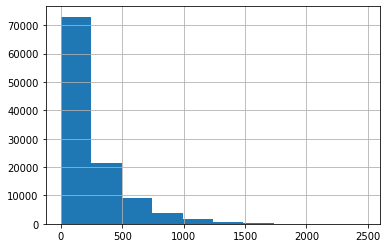

In [51]:
datafinal[datafinal["IsUsed"]]["distance"].hist()

<AxesSubplot:>

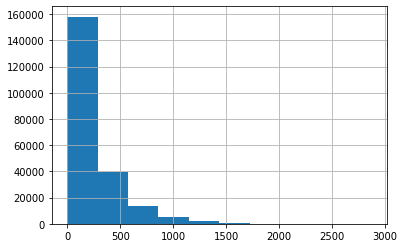

In [52]:
datafinal["distance"].hist()

In [53]:
fft = datafinal["region"].str.split(":", expand=True)

In [54]:
fft.head()
fft[0] = "chr"+fft[0]

In [55]:
width = fft[2].astype(int) - fft[1].astype(int) 

<AxesSubplot:>

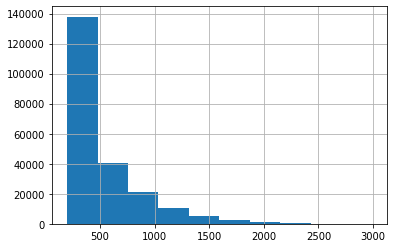

In [56]:
width.hist()

In [57]:
fft

,0,1,2
0,chr1,866099,866351
1,chr1,866099,866351
2,chr1,869800,870282
3,chr1,904938,905544
4,chr1,904938,905544
...,...,...,...
219377,chr22,50627308,50627508
219378,chr22,50627514,50628822
219379,chr22,50627514,50628822
219380,chr22,50627514,50628822


In [92]:

temps.head(1)

chr1	866280	866281	C	T	1_866281_C_T	1:866099:866351	1_866281_C_T	181	0.97428	0.00654566	0.202449	0.00654566	-0.0198358239733333	-0.0092910501638771	-0.0371476132	-0.0098478139667772	-0.0107790358	-0.0112429074557623	-0.03047294212	-0.007854980010384	-0.0274319003999999	-0.0104460740301044	-0.015266906	-0.0074909427884077	3.842012393515388e-05	0.47469310823965	-0.00869365584	-0.0048307100337268	2.439625108697341e-05	0.5218877975662511	-0.027134499	-0.0065437883004904	4.429526404646882e-05	0.4069019535301472	-0.0319308548	-0.0090450750534331	0.0001624065727458	0.1928464912342504	-0.0172759259	-0.0108619390346573	-0.01244030388	-0.0089491793240438	-0.02061483574	-0.006391221128311	False	2
 

In [95]:
sum(temps1["counts"]>0)

218803

In [94]:
temps1.shape

(219382, 47)

In [99]:
datafinal.shape

(219382, 45)

In [100]:
temps1["IsUsed"]  = datafinal["IsUsed"] 

In [103]:
temps1
sum(temps1["IsUsed"])

109707

In [104]:
sum(temps1[temps1["IsUsed"]]["counts"] > 0)

109646

In [98]:
temps1.columns

Index(['chr', 'pos0', 'pos', 'allele1', 'allele2', 'rsid', 'region', 'snp',
       'distance', 'pval', 'beta', 'se', 'abs_beta', 'afr.mean.logfc',
       'afr.mean.sign.jsd', 'eur.mean.logfc', 'eur.mean.sign.jsd',
       'Gambian.mean.logfc', 'Gambian.mean.sign.jsd', 'Mende.mean.logfc',
       'Mende.mean.sign.jsd', 'Yoruba.mean.logfc', 'Yoruba.mean.sign.jsd',
       'GM12878.ENCSR637XSC.mean.logfc', 'GM12878.ENCSR637XSC.mean.sign.jsd',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile.pval',
       'GM12878.ENCSR000EMT.mean.logfc', 'GM12878.ENCSR000EMT.mean.sign.jsd',
       'GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd_x_max_percentile.pval',
       'GM12878.ENCSR637XSC.sub.50M.mean.logfc',
       'GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd',
       'GM12878.ENCSR637XSC.sub.50M.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR6